In [2]:
import polars as pl
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
filter_benchs = (
    pl.read_csv("group.csv")
    .select("dataset_size", "tool", "cpu_count", "time_in_seconds")
    .with_columns(pl.col("dataset_size").str.replace("MB", "").str.to_integer(), pl.col("tool").str.split("-").list.get(0))
)
grouped_filter_benchs = (
    filter_benchs.group_by("dataset_size", "tool", "cpu_count")
    .mean()
    .sort(by=["tool", "dataset_size"])
)
grouped_filter_benchs.head(10)

dataset_size,tool,cpu_count,time_in_seconds
i64,str,i64,f64
200,"""dask""",1,7.675157
200,"""dask""",20,7.6906
400,"""dask""",20,16.655072
400,"""dask""",1,16.671747
800,"""dask""",1,27.070162
800,"""dask""",20,27.278071
1600,"""dask""",20,55.123494
1600,"""dask""",1,55.185024
3200,"""dask""",20,158.372624


In [15]:
grouped_filter_benchs.filter(pl.col("cpu_count") != 1)

dataset_size,tool,cpu_count,time_in_seconds
i64,str,i64,f64
200,"""dask""",20,7.6906
400,"""dask""",20,16.655072
800,"""dask""",20,27.278071
1600,"""dask""",20,55.123494
3200,"""dask""",20,158.372624
…,…,…,…
200,"""pyspark""",20,2.433473
400,"""pyspark""",20,2.998538
800,"""pyspark""",20,3.704956


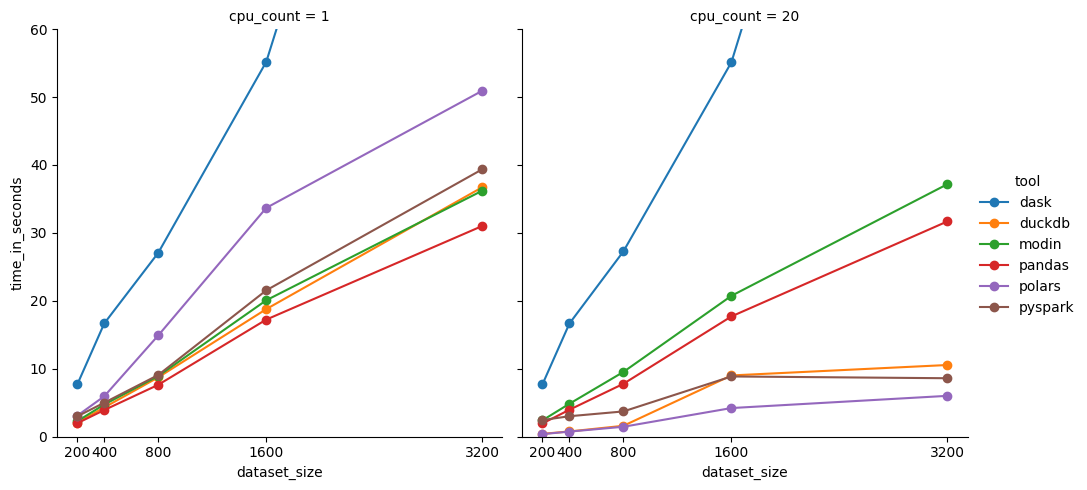

In [16]:
grid = sns.FacetGrid(grouped_filter_benchs, col="cpu_count", hue="tool", col_wrap=2, height=5)
grid.map(plt.plot, "dataset_size", "time_in_seconds", marker="o")
grid.set(xticks=grouped_filter_benchs.unique("dataset_size").to_series().sort(), ylim=(0, 60))
grid.add_legend()
# grid.set(xticks=np.arange(5), yticks=[-3, 3],
#          xlim=(-.5, 4.5), ylim=(-3.5, 3.5))
# grid.fig.tight_layout(w_pad=1)